$\textbf{Finit element method : Simulation of the pressure wave which can be perturbated during the earthquake and can affect the ionosphere.}$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Parameters
"""
c = 343  # Speed of sound in air (m/s)
dx = 10  # Spatial grid spacing (meters)
dt = 0.01  # Temporal grid spacing (seconds)
duration = 10  # Simulation duration (seconds)
source_position = (70, 60)  # Source position in grid coordinates

# Grid setup
grid_size_x = 100
grid_size_y = 100
x = np.linspace(0, (grid_size_x - 1) * dx, grid_size_x)
y = np.linspace(0, (grid_size_y - 1) * dx, grid_size_y)
X, Y = np.meshgrid(x, y)
"
# Set up the map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')

# Initial conditions
pressure = np.zeros((grid_size_x, grid_size_y))
pressure[source_position] = 1  # Initial pressure disturbance at the source position

# Simulation loop
num_steps = int(duration / dt)
for step in range(num_steps):
    laplacian = (np.roll(pressure, 1, axis=0) + np.roll(pressure, -1, axis=0)
                 + np.roll(pressure, 1, axis=1) + np.roll(pressure, -1, axis=1) - 4 * pressure) / dx**2

    pressure_new = 2 * pressure - pressure + (c * dt)**2 * laplacian

    pressure = pressure_new

    # Create a new subplot for each time step
    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')

    # Plot the pressure field at each time step
    im = ax.imshow(pressure, extent=(-180, 180, -90, 90), origin='lower', cmap='viridis', transform=ccrs.PlateCarree())
    ax.set_title(f'Time: {step * dt:.2f} seconds')
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Pressure')

    # Show the plot
    plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (1554102343.py, line 51)

/tmp/ipykernel_1489/3584877611.py:53: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(im, orientation='vertical', label='Pressure')


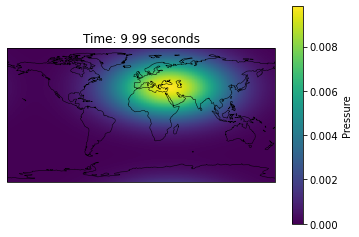

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation

# Parameters
c = 343  # Speed of sound in air (m/s)
dx = 10  # Spatial grid spacing (meters)
dt = 0.01  # Temporal grid spacing (seconds)
duration = 10  # Simulation duration (seconds)
source_position = (70, 60)  # Source position in grid coordinates

# Grid setup
grid_size_x = 100
grid_size_y = 100
x = np.linspace(0, (grid_size_x - 1) * dx, grid_size_x)
y = np.linspace(0, (grid_size_y - 1) * dx, grid_size_y)
X, Y = np.meshgrid(x, y)

# Set up the map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')

# Initial conditions
pressure = np.zeros((grid_size_x, grid_size_y))
pressure[source_position] = 1  # Initial pressure disturbance at the source position


num_steps = int(duration / dt)

# Function to update the plot for each frame
def update(frame):
    global pressure
    
    # Compute the Laplacian using finite differences
    laplacian = (np.roll(pressure, 1, axis=0) + np.roll(pressure, -1, axis=0)
                 + np.roll(pressure, 1, axis=1) + np.roll(pressure, -1, axis=1) - 4 * pressure) / dx**2
    
    # Update pressure using the wave equation
    pressure_new = 2 * pressure - pressure + (c * dt)**2 * laplacian
    
    # Update pressure for the next time step
    pressure = pressure_new


    ax.clear()
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black')
    ax.set_title(f'Time: {frame * dt:.2f} seconds')
    im = ax.imshow(pressure, extent=(-180, 180, -90, 90), origin='lower', cmap='viridis', transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, orientation='vertical', label='Pressure')

# Create an animation
animation = FuncAnimation(fig, update, frames=num_steps, repeat=False)
animation.save('please.gif', writer = 'pillow', fps=50)

# Show the animation
plt.show()